<a href="https://colab.research.google.com/github/sajnanoushad/diabetes_predict/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Diabetes Progression using Artificial Neural Networks(ANN)

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = datasets.load_diabetes()
X, y = df.data, df.target
df = pd.DataFrame(data=X, columns=df.feature_names)
df['target'] = y

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [14]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [8]:
df.shape

(442, 11)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [15]:
df.duplicated().sum()

0

In [17]:
df.iloc[:,0:8]

,age,sex,bmi,bp,s1,s2,s3,s4
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592
...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560


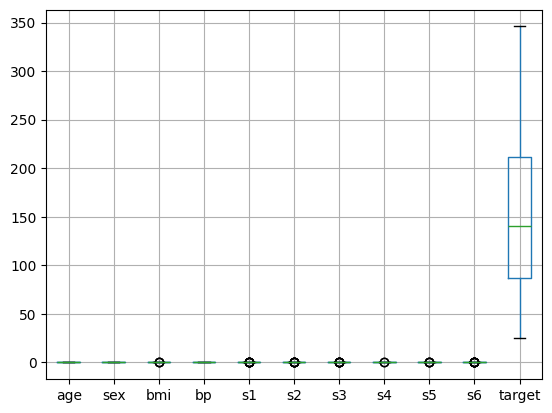

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot()
plt.show()

Distribution of target variable

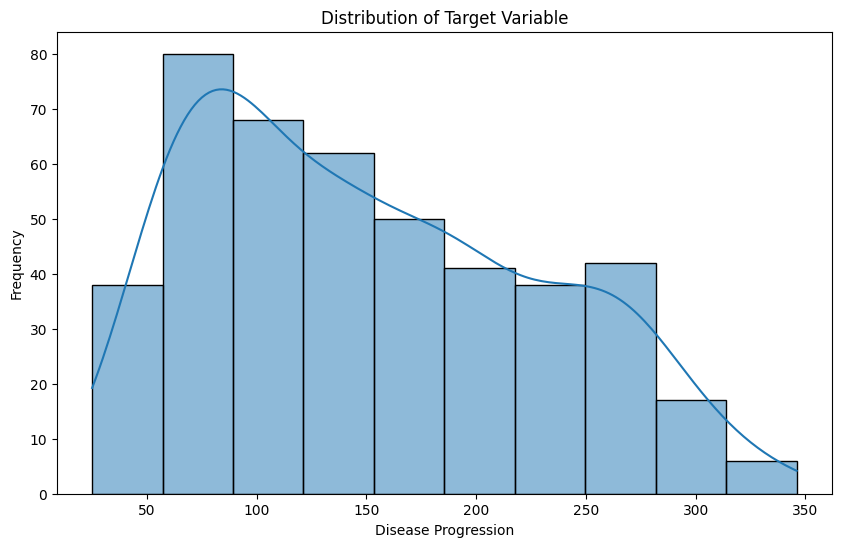

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()

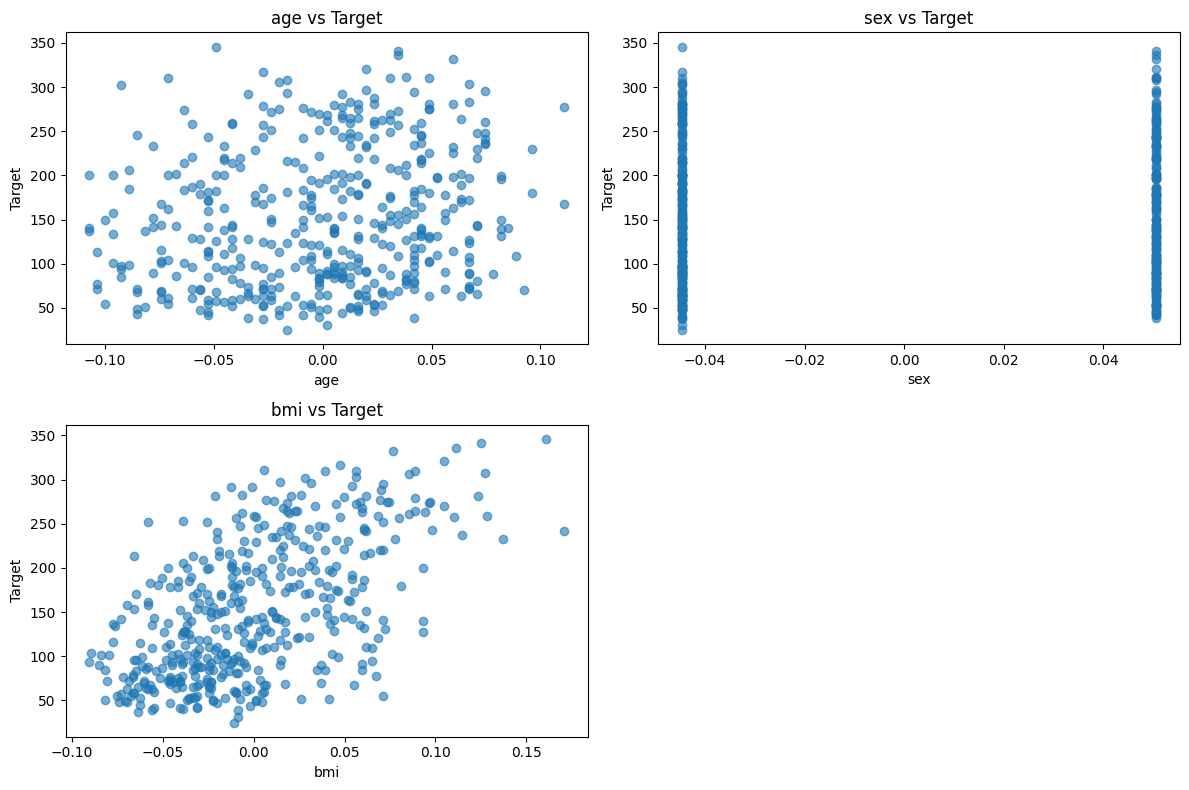

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i, feat in enumerate(df.columns[:3]):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df[feat], df['target'], alpha=0.6)
    plt.title(f'{feat} vs Target')
    plt.xlabel(feat)
    plt.ylabel('Target')
plt.tight_layout()
plt.show()

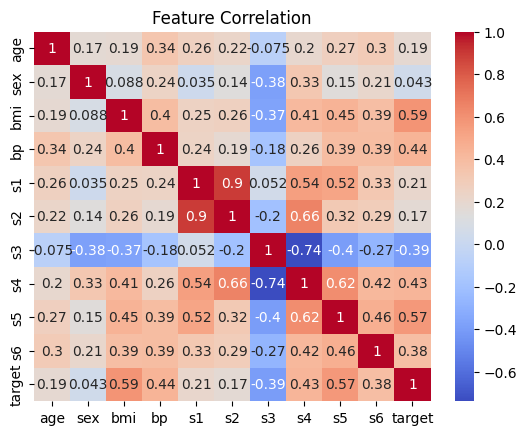

In [23]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

 Building the ANN model

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.InputLayer(input_shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) ])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 31816.8320 - mean_squared_error: 31816.8320 - val_loss: 22159.1348 - val_mean_squared_error: 22159.1348
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30080.1914 - mean_squared_error: 30080.1914 - val_loss: 21958.2207 - val_mean_squared_error: 21958.2207
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30874.8906 - mean_squared_error: 30874.8906 - val_loss: 21716.0352 - val_mean_squared_error: 21716.0352
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29870.6211 - mean_squared_error: 29870.6211 - val_loss: 21422.4922 - val_mean_squared_error: 21422.4922
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29975.8262 - mean_squared_error: 29975.8262 - val_loss: 21059.1855 - val_mean_squared_error: 21059.1855
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27865.7363 - mean_squared_error: 27865.7363 - val_loss: 20615.4453 - val_mean_squared_error: 20615.4453
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━

In [30]:

from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R² Score: {r2}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MSE: 2876.417496143105
R² Score: 0.45709039063510093


In [31]:
model_improved = models.Sequential([
    layers.InputLayer(input_shape=(X_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_improved.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the improved model
history_improved = model_improved.fit(X_train, y_train, epochs=150, validation_split=0.2, batch_size=32, verbose=1)

# Evaluate the improved model
test_loss_improved, test_mse_improved = model_improved.evaluate(X_test, y_test, verbose=0)
y_pred_improved = model_improved.predict(X_test)
r2_improved = r2_score(y_test, y_pred_improved)

print(f'Improved Test MSE: {test_mse_improved}')
print(f'Improved R² Score: {r2_improved}')

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 33109.1445 - mean_squared_error: 33109.1445 - val_loss: 22324.0957 - val_mean_squared_error: 22324.0957
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31184.8398 - mean_squared_error: 31184.8398 - val_loss: 22090.2148 - val_mean_squared_error: 22090.2148
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32234.1895 - mean_squared_error: 32234.1895 - val_loss: 21689.6348 - val_mean_squared_error: 21689.6348
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29952.2754 - mean_squared_error: 29952.2754 - val_loss: 20966.8340 - val_mean_squared_error: 20966.8340
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29948.1543 - mean_squared_error: 29948.1543 - val_loss: 19691.1465 - val_mean_squared_error: 19691.1465
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26388.1934 - mean_squared_error: 26388.1934 - val_loss: 17610.3398 - val_mean_squared_error: 17610.3398
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━

Conclusion:

The first model had a Mean Squared Error (MSE) of 2876.41 and an R² score of 0.45709, which shows that it performed moderately. After making some changes to the model, the MSE improved to 2783.34, and the R² score increased to 0.4746. This means the updated model predicts diabetes progression better and helps us understand the important factors involved more clearly.